## 1: Import Libraries
## This cell imports the necessary libraries:

## random — to randomly select centroids.

## matplotlib.pyplot — to plot graphs and show results visually.

In [ ]:
import random
import matplotlib.pyplot as plt

## 2: Create Dataset
## This cell manually creates a small dataset of 20 points with x and y coordinates that we will use for clustering.

In [ ]:
# Step 1: Create a dataset manually
data = [
    (5, 25), (10, 20), (15, 30), (20, 25), (25, 20),
    (30, 35), (35, 30), (40, 25), (45, 30), (50, 25),
    (20, 5), (25, 10), (30, 5), (35, 10), (40, 5),
    (5, 45), (10, 50), (15, 45), (20, 50), (25, 45)
]


## 3: Define Euclidean Distance Function
## This function calculates the Euclidean distance (the straight-line distance) between two points. It will be used to find which centroid is closest to each point.

In [ ]:
# Step 2: Define the distance function (Euclidean Distance)
def euclidean_distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) ** 0.5

## 4: Initialize Random Centroids
## This function randomly selects k points from the dataset to be the initial centroids (starting points for clusters)

In [ ]:
# Step 3: Initialize K random centroids
def initialize_centroids(data, k):
    return random.sample(data, k)

## 5: Assign Points to Nearest Centroid
## This function assigns each data point to the nearest centroid by calculating distances and grouping points into clusters.

In [ ]:
# Step 4: Assign points to nearest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        min_distance_index = distances.index(min(distances))
        clusters[min_distance_index].append(point)
    return clusters

## 6: Update Centroids
## This function updates the centroid of each cluster by taking the average (mean) of all points in that cluster.

In [ ]:
# Step 5: Update centroids
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:
            x_mean = sum([p[0] for p in cluster]) / len(cluster)
            y_mean = sum([p[1] for p in cluster]) / len(cluster)
            new_centroids.append((x_mean, y_mean))
        else:
            # If a cluster gets no points, randomly re-initialize
            new_centroids.append((random.randint(0, 50), random.randint(0, 50)))
    return new_centroids


## 7: Main K-Means Function
## This function puts everything together:

Initialize centroids.

Assign points to clusters.

Update centroids.

Repeat until centroids stop moving (convergence) or maximum iterations are reached.



In [ ]:
# Step 6: K-Means main function
def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)

        # Check for convergence (if centroids don't change)
        if new_centroids == centroids:
            print(f"Converged after {i+1} iterations")
            break
        centroids = new_centroids

    return clusters, centroids


## 8: Plotting Clusters
## This function draws the clusters using different colors for each cluster and shows centroids as big black X's.



In [ ]:
# Step 7: Plot the clusters
def plot_clusters(clusters, centroids, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange']

    for idx, cluster in enumerate(clusters):
        x_coords = [point[0] for point in cluster]
        y_coords = [point[1] for point in cluster]
        plt.scatter(x_coords, y_coords, c=colors[idx % len(colors)], label=f'Cluster {idx+1}')

    # Plot centroids
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='X', s=200, c='black')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()


## 9: Main Program (Run and Plot)
## First, it plots the original data points without any clusters.

Then, it runs the K-Means algorithm.

Finally, it plots the final clusters formed by K-Means.

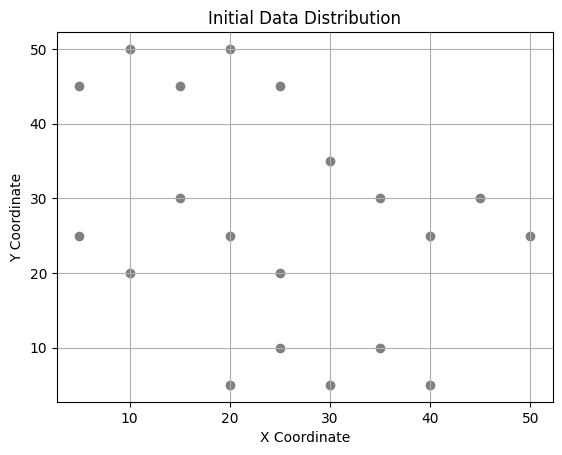

Converged after 6 iterations


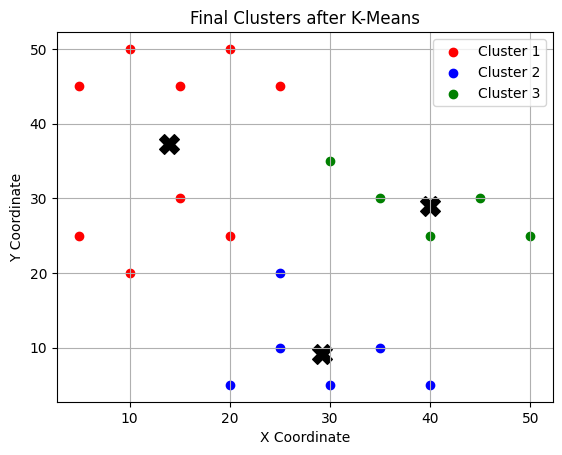

In [ ]:
# Main Program
k = 3  # Number of clusters

# Plot the initial data
x_vals = [point[0] for point in data]
y_vals = [point[1] for point in data]
plt.scatter(x_vals, y_vals, c='grey')
plt.title('Initial Data Distribution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

# Apply K-Means
clusters, centroids = k_means(data, k)

# Plot final clusters
plot_clusters(clusters, centroids, 'Final Clusters after K-Means')
